# Build network based on kinase-phosphosite interactions

This notebook provides the code to create a network based on kinase-substrate interactions and the annotated effect of phosphorylation (based on PhosphositePlus) on the activity of the substrate.

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko.inputs import Universe, phosphosite
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

/home/denes/.cache/pypoetry/virtualenvs/neko-JkLH1s9m-py3.11/lib/python3.11/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/denes/.cache/pypoetry/virtualenvs/neko-JkLH1s9m-py3.11/lib/python3.11/site-packages/paramiko/transport.py:259: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


CPU times: user 30.8 s, sys: 3.02 s, total: 33.8 s
Wall time: 35.1 s


## 1. Specify kinase-substrate interaction file and phosphosite effect annotation

In this example, both files we utilize are from PhosphositePlus.

In [2]:
kinase_int_file = ("../neko/_data/Kinase_Substrate_Dataset")
phospho_effect_file = ("../neko/_data/Regulatory_sites")

## 2. Add interactions as a resource database

The *_process_psp_interactions_* function parses the provided files to create an interaction database in the Omnipath format.

In [2]:
resources = phosphosite()

In [3]:
resources.interactions

,source,target,is_inhibition,is_stimulation
0,EIF2AK1,EIF2S1_S52,True,True
1,PRKCD,HDAC5_S259,True,True
2,PRKCD,PTPRA_S204,False,True
3,PRKCD,BCL2_S70,True,False
4,PRKCD,SLC9A1_S648,True,False
...,...,...,...,...
8827,NUAK1,PPP1R12A_S910,True,True
8828,NUAK1,TP53_S15,True,True
8829,ULK2,STING1_S366,False,True
8830,ULK2,BECN1_S30,False,True


## 3. Define a set of phosphosites we are interested in

In [4]:
genes = ['AKT1S1_T246', 'GSK3B_S9', 'AKT1_S473', 'HSPB1_S78', 'HSPB1_S82', 'MAPK14_T180', 'MAPK14_Y182', 'MAP2K1_S218', 'MAP2K1_S222', 'RPS6KA1_S380', 'MTOR_S2448', 'JUN_S63', 'MAPK3_T202', 'MAPK3_Y204']

## 4. Build network

In [5]:
%%time
new_net1 = Network(genes, resources=resources.interactions)

CPU times: user 15.5 s, sys: 1.74 s, total: 17.3 s
Wall time: 18 s


<div class="alert alert-info">

**Note**
    
Neko is based on UniProt IDs. It is still possible to use databases with other IDs, but an error message will appear during the translation progress, as in the example below.  

</div>  

In [6]:
%%time
new_net1.complete_connection(algorithm= 'bfs',only_signed=True, connect_with_bias=True)

CPU times: user 1.73 s, sys: 625 ms, total: 2.36 s
Wall time: 2.59 s


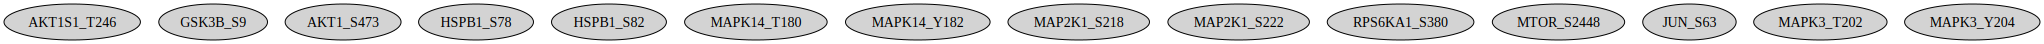

In [7]:
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render()